Size: 100, Time: 0.0000 ms
Size: 200, Time: 0.0000 ms
Size: 300, Time: 0.0000 ms
Size: 400, Time: 0.0000 ms
Size: 500, Time: 5.5239 ms
Size: 600, Time: 0.0000 ms
Size: 700, Time: 2.0237 ms
Size: 800, Time: 2.0087 ms
Size: 900, Time: 2.0072 ms
Size: 1000, Time: 2.0041 ms
Size: 2000, Time: 9.6452 ms
Size: 3000, Time: 19.1424 ms
Size: 4000, Time: 18.0273 ms
Size: 5000, Time: 26.7928 ms
Size: 6000, Time: 24.7586 ms
Size: 7000, Time: 34.2665 ms


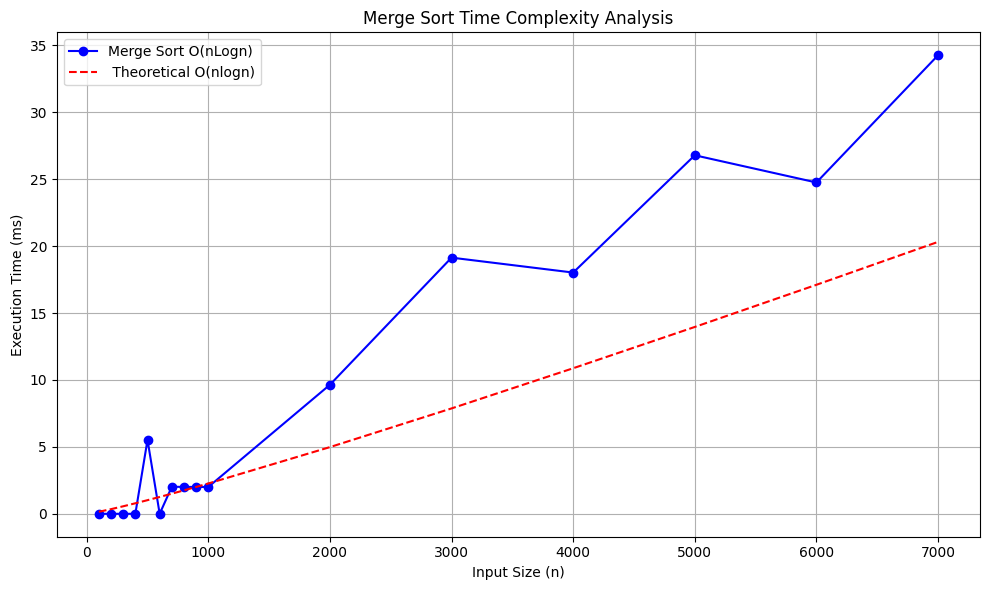

In [10]:
import matplotlib.pyplot as plt
import random
import time
import math

def merge(arr, si, mid, ei):
    temp = [0] * (ei - si + 1)
    i = si
    j = mid + 1
    k = 0

    while i <= mid and j <= ei:
        if arr[i] < arr[j]:
            temp[k] = arr[i]
            i += 1
        else:
            temp[k] = arr[j]
            j += 1
        k += 1

    while i <= mid:
        temp[k] = arr[i]
        i += 1
        k += 1

    while j <= ei:
        temp[k] = arr[j]
        j += 1
        k += 1

    # Copy back to original array
    for idx in range(len(temp)):
        arr[si+idx] = temp[idx]

def mergeSort(arr, si, ei):
    if si >= ei:
        return
    mid = (si + ei) // 2
    mergeSort(arr, si, mid)
    mergeSort(arr, mid + 1, ei)
    merge(arr, si, mid, ei)

# Input sizes to test
input_sizes = [100,200,300,400,500,
               600, 700, 800, 900, 1000,2000,3000,4000,5000,6000,7000]
execution_times = []

# Measure execution time for each input size
for size in input_sizes:
    # Generate a random array of given size
    arr = []
    for _ in range(size):
        num = random.randint(0, size)
        arr.append(num)

    # Record the time taken to sort
    start_time = time.time()
    mergeSort(arr,0,len(arr)-1)
    end_time = time.time()

    # Store time in milliseconds
    elapsed_time = (end_time - start_time) * 1000
    execution_times.append(elapsed_time)
    print(f"Size: {size}, Time: {elapsed_time:.4f} ms")

# Extract median n and time
median_idx = len(input_sizes) // 2
median_n = input_sizes[median_idx]
median_time = execution_times[median_idx]
scaling_factor = median_time / (median_n * math.log(median_n))

#Calculation of theoretical time
theoretical_times = [scaling_factor * n * math.log(n) for n in input_sizes]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o',
         linestyle='-', color='blue', label='Merge Sort O(nLogn)')
plt.plot(input_sizes, theoretical_times, marker='',
         linestyle='--', color='red', label=' Theoretical O(nlogn)')
plt.title("Merge Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
    

